**решающее дерево**

Евгений Борисов <esborisov@sevsu.ru>

---

In [1]:
# from sklearn.datasets import load_iris
# data = load_iris()

In [2]:
from sklearn.datasets import load_wine
data = load_wine()

In [3]:
X = data['data']
target = data['target']
feature_names = data['feature_names'] 
target_names = data['target_names'] 

from sklearn.model_selection import train_test_split

X_train, X_test, target_train, target_test = train_test_split(X,target,test_size=.5)
display( X_train.shape, X_test.shape, )

assert len(target_train) == len(X_train)
assert len(target_test) == len(X_test)

del X,target,data

(89, 13)

(89, 13)

In [4]:
display(feature_names)

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, target_train)

In [6]:
from sklearn.metrics import classification_report

predicted = model.predict(X_test)

# метрики результата на тестовом наборе
print( classification_report(target_test,predicted) )

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        27
           1       0.82      0.92      0.87        39
           2       0.90      0.78      0.84        23

    accuracy                           0.88        89
   macro avg       0.89      0.86      0.88        89
weighted avg       0.88      0.88      0.88        89



In [7]:
# метрики результата на учебном наборе
print( classification_report(target_train, model.predict(X_train) ) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        25

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



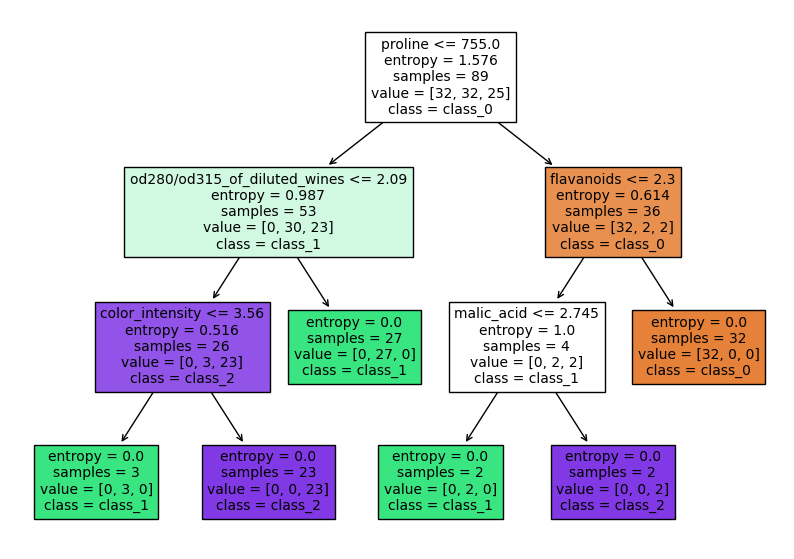

In [20]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(10,7))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=target_names,
    fontsize=10,
    filled=True,
    ax=ax,
) 
plt.show()

In [10]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot = graphviz.Source( 
#     export_graphviz(
#         model,
#         feature_names=feature_names,
#         class_names=target_names,
#         filled=True, 
#         rounded=True,
#         impurity=False,
#     ) 
# )

# display( dot )

In [21]:
import pandas as pd

display(
    pd.DataFrame({
        'feature':feature_names, 
        'importance':model.feature_importances_,
        }).sort_values(by='importance',ascending=False)
)

,feature,importance
12,proline,0.469150
11,od280/od315_of_diluted_wines,0.277492
6,flavanoids,0.129184
9,color_intensity,0.095652
1,malic_acid,0.028522
0,alcohol,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
